<a href="https://colab.research.google.com/github/dattali18/IR_Assignments/blob/main/Assignment.05/IR_05_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import warnings


warnings.filterwarnings("ignore")

In [16]:
!pip install --upgrade pip

# Artificial Neural Network (ANN):

- Data split: 80% training (with 10% validation), 20% testing
- Maximum 15 epochs
- Batch size of 32
- Specific architecture requirements:
  - 4 hidden layers (3×32 nodes, 1×16 nodes)
  - ReLU activation for hidden layers
  - Softmax for output layer


Include callbacks:

- Early stopping after 5 iterations without improvement
- Model checkpoint for best accuracy

In [17]:
import pandas as pd

pro_israel_url = "https://github.com/dattali18/IR_Assignments/blob/main/Assignment.05/data/Train/pro_israel_sample.csv?raw=true"
pro_palestine_url = "https://github.com/dattali18/IR_Assignments/blob/main/Assignment.05/data/Train/pro_palestine_sample.csv?raw=true"
neutral_url = "https://github.com/dattali18/IR_Assignments/blob/main/Assignment.05/data/Train/neutral_sample.csv?raw=true"
anti_israel_url = "https://raw.githubusercontent.com/dattali18/IR_Assignments/refs/heads/main/Assignment.05/data/Train/anti_israel_sample.csv"
anti_palestine_url = "https://github.com/dattali18/IR_Assignments/blob/main/Assignment.05/data/Train/anti_palestine_sample.csv?raw=true"

In [18]:
df_pro_israel = pd.read_csv(pro_israel_url)

In [19]:
df_pro_palestine = pd.read_csv(pro_palestine_url)

In [20]:
df_neutral = pd.read_csv(neutral_url)

In [21]:
df_anti_israel = pd.read_csv(anti_israel_url)

In [22]:
df_anti_palestine = pd.read_csv(anti_palestine_url)

In [23]:
df_data = pd.concat([df_pro_israel, df_pro_palestine, df_neutral, df_anti_palestine, df_anti_israel])

In [24]:
df_data.head()

,id,sentence,pro-israel,pro-palestine,neutral,anti-israel,anti-palestine,bert_embedding,sbert_embedding
0,jp_374,Then we wanted to make aliyah even faster,1,0,0,0,0,"[3.0425227, -1.1359235, 0.43601155, -1.492075,...","[0.05916492, 0.06573158, -0.029959153, 0.02329..."
1,bbc_129,an idf spokesman previously referred to the op...,1,0,0,0,0,"[-18.13917, -8.694932, -7.9792914, -6.937172, ...","[0.008423236, -0.008944497, -0.040801875, -0.0..."
2,bbc_177,the idf hasnt been able to get to the top bras...,1,0,0,0,0,"[-10.683661, -5.2386255, -11.027782, -7.586564...","[-0.078493364, 0.01857767, -0.022938907, -0.02..."
3,bbc_91,more than half of gazas 2 3 million palestini...,1,0,0,0,0,"[-5.767392, 1.9060941, -6.5959663, -7.4976315,...","[0.09185139, 0.05003456, 0.026224826, 0.068916..."
4,bbc_176,the idf said a series of mistakes and miscommu...,1,0,0,0,0,"[3.9196055, -0.5979823, -4.363714, -6.756728, ...","[0.015880365, 0.057834163, 0.06488896, 0.02469..."


In [25]:
df_data.shape

(6275, 9)

In [26]:
df_test = df_data[['id', 'sentence', 'bert_embedding', 'sbert_embedding']]

In [27]:
df_pro_israel[['bert_embedding', 'sbert_embedding']].head()

,bert_embedding,sbert_embedding
0,"[3.0425227, -1.1359235, 0.43601155, -1.492075,...","[0.05916492, 0.06573158, -0.029959153, 0.02329..."
1,"[-18.13917, -8.694932, -7.9792914, -6.937172, ...","[0.008423236, -0.008944497, -0.040801875, -0.0..."
2,"[-10.683661, -5.2386255, -11.027782, -7.586564...","[-0.078493364, 0.01857767, -0.022938907, -0.02..."
3,"[-5.767392, 1.9060941, -6.5959663, -7.4976315,...","[0.09185139, 0.05003456, 0.026224826, 0.068916..."
4,"[3.9196055, -0.5979823, -4.363714, -6.756728, ...","[0.015880365, 0.057834163, 0.06488896, 0.02469..."


In [28]:
# get the data out of the df, the needed columns are bert_embedding, sbert_embedding
# then we will add the number representation of the class
# convert the data to numpy

import numpy as np

class_map = {"pro_israel": 0, "pro_palestine": 1, "neutral": 2, "anti_israel": 3, "anti_palestine": 4}

pro_israel_bert_data = df_pro_israel["bert_embedding"]
pro_israel_sbert_data = df_pro_israel["sbert_embedding"]

print(len(pro_israel_bert_data))
print(len(pro_israel_sbert_data))

1255
1255


In [29]:
# convert each instance of the data into a numpy instance

pro_israel_bert_data = np.array([eval(instance) for instance in pro_israel_bert_data])
pro_israel_sbert_data = np.array([eval(instance) for instance in pro_israel_sbert_data])

print(pro_israel_bert_data.shape)
print(pro_israel_sbert_data.shape)

(1255, 768)
(1255, 384)


In [30]:
# do the same with all others

pro_palestine_bert_data = df_pro_palestine["bert_embedding"]
pro_palestine_sbert_data = df_pro_palestine["sbert_embedding"]

pro_palestine_bert_data = np.array([eval(instance) for instance in pro_palestine_bert_data])
pro_palestine_sbert_data = np.array([eval(instance) for instance in pro_palestine_sbert_data])

print(pro_palestine_bert_data.shape)
print(pro_palestine_sbert_data.shape)

(1255, 768)
(1255, 384)


In [31]:
neutral_bert_data = df_neutral["bert_embedding"]
neutral_sbert_data = df_neutral["sbert_embedding"]

neutral_bert_data = np.array([eval(instance) for instance in neutral_bert_data])
neutral_sbert_data = np.array([eval(instance) for instance in neutral_sbert_data])

print(neutral_bert_data.shape)
print(neutral_sbert_data.shape)

(1255, 768)
(1255, 384)


In [32]:
anti_israel_bert_data = df_anti_israel["bert_embedding"]
anti_israel_sbert_data = df_anti_israel["sbert_embedding"]

anti_israel_bert_data = np.array([eval(instance) for instance in anti_israel_bert_data])
anti_israel_sbert_data = np.array([eval(instance) for instance in anti_israel_sbert_data])

print(anti_israel_bert_data.shape)
print(anti_israel_sbert_data.shape)

(1255, 768)
(1255, 384)


In [33]:
anti_palestine_bert_data = df_anti_palestine["bert_embedding"]
anti_palestine_sbert_data = df_anti_palestine["sbert_embedding"]

anti_palestine_bert_data = np.array([eval(instance) for instance in anti_palestine_bert_data])
anti_palestine_sbert_data = np.array([eval(instance) for instance in anti_palestine_sbert_data])

print(anti_palestine_bert_data.shape)
print(anti_palestine_sbert_data.shape)

(1255, 768)
(1255, 384)


In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
pro_israel_bert_data.shape, pro_palestine_bert_data.shape, neutral_bert_data.shape, anti_israel_bert_data.shape, anti_palestine_bert_data.shape

((1255, 768), (1255, 768), (1255, 768), (1255, 768), (1255, 768))

In [36]:
pro_israel_sbert_data.shape, pro_palestine_sbert_data.shape, neutral_sbert_data.shape, anti_israel_sbert_data.shape, anti_palestine_sbert_data.shape

((1255, 384), (1255, 384), (1255, 384), (1255, 384), (1255, 384))

In [37]:
# For BERT data (768 dimensions)
X_bert = np.vstack([
    pro_israel_bert_data,
    pro_palestine_bert_data,
    neutral_bert_data,
    anti_palestine_bert_data,
    anti_israel_bert_data
])

y_bert = np.array(
    [0] * len(pro_israel_bert_data) +       # 0s for pro-israel
    [1] * len(pro_palestine_bert_data) +    # 1s for pro-palestinian
    [2] * len(neutral_bert_data) +          # 2s for neutral
    [3] * len(anti_palestine_bert_data) +   # 3s for anti-palestinian
    [4] * len(anti_israel_bert_data)        # 4s for anti-israel
)

y_bert_onehot = to_categorical(y_bert)

In [38]:
X_bert.shape, y_bert_onehot.shape

((6275, 768), (6275, 5))

In [39]:
# Split the data (80% train, 20% test)
X_bert_train, X_bert_test, y_bert_train, y_bert_test = train_test_split(
    X_bert, y_bert_onehot, test_size=0.2, random_state=42
)

In [40]:
# Further split training data to create validation set (10% of original data)
X_bert_train, X_bert_val, y_bert_train, y_bert_val = train_test_split(
    X_bert_train, y_bert_train, test_size=0.125, random_state=42  # 0.125 of 80% is 10% of total
)

In [41]:
# Do the same for SBERT data (384 dimensions)
X_sbert = np.vstack([
    pro_israel_sbert_data,
    pro_palestine_sbert_data,
    neutral_sbert_data,
    anti_palestine_sbert_data,
    anti_israel_sbert_data
])

# The labels will be the same as for BERT
y_sbert = y_bert.copy()
y_sbert_onehot = to_categorical(y_sbert)

In [42]:
y_sbert_onehot.shape, X_sbert.shape

((6275, 5), (6275, 384))

In [43]:
# Split SBERT data
X_sbert_train, X_sbert_test, y_sbert_train, y_sbert_test = train_test_split(
    X_sbert, y_sbert_onehot, test_size=0.2, random_state=42
)

X_sbert_train, X_sbert_val, y_sbert_train, y_sbert_val = train_test_split(
      X_sbert_train, y_sbert_train, test_size=0.125, random_state=42
)

NOTE: up until now it's the same for any other type of ML

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# First, ensure we're using GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available")
else:
    print("No GPU found, running on CPU")

GPU is available


In [45]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Create separate checkpoints for BERT and SBERT models
bert_checkpoint = ModelCheckpoint(
    'best_bert_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

sbert_checkpoint = ModelCheckpoint(
    'best_sbert_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

In [46]:
# BERT Model (input dimension 768)
bert_model = Sequential([
    Dense(32, activation='relu', input_dim=768),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes
])

In [47]:
# SBERT Model (input dimension 384)
sbert_model = Sequential([
    Dense(32, activation='relu', input_dim=384),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes
])

In [48]:
# Compile models
bert_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
sbert_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
# Train BERT model
bert_history = bert_model.fit(
    X_bert_train,
    y_bert_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_bert_val, y_bert_val),
    callbacks=[early_stopping, bert_checkpoint],
    verbose=1
)

Epoch 1/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2648 - loss: 1.8217

138/138 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.2649 - loss: 1.8202 - val_accuracy: 0.3631 - val_loss: 1.4001
Epoch 2/15
134/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3851 - loss: 1.3905

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3867 - loss: 1.3894 - val_accuracy: 0.4825 - val_loss: 1.3016
Epoch 3/15
135/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4811 - loss: 1.2827

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4817 - loss: 1.2815 - val_accuracy: 0.4873 - val_loss: 1.2656
Epoch 4/15
131/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5552 - loss: 1.1236

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5559 - loss: 1.1230 - val_accuracy: 0.5828 - val_loss: 1.1141
Epoch 5/15
136/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6127 - loss: 1.0312

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6126 - loss: 1.0311 - val_accuracy: 0.6003 - val_loss: 1.0648
Epoch 6/15
129/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6443 - loss: 0.9283

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6441 - loss: 0.9291 - val_accuracy: 0.6290 - val_loss: 0.9936
Epoch 7/15
129/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6480 - loss: 0.9146

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6483 - loss: 0.9143 - val_accuracy: 0.6561 - val_loss: 0.9748
Epoch 8/15
133/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6893 - loss: 0.8071

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6888 - loss: 0.8083 - val_accuracy: 0.6608 - val_loss: 0.9908
Epoch 9/15
133/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - loss: 0.8402

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6772 - loss: 0.8385 - val_accuracy: 0.6624 - val_loss: 0.9479
Epoch 10/15
131/138 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7179 - loss: 0.7437

138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7181 - loss: 0.7440 - val_accuracy: 0.6640 - val_loss: 0.9722
Epoch 11/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7371 - loss: 0.6936 - val_accuracy: 0.6513 - val_loss: 1.0762
Epoch 12/15
128/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7527 - loss: 0.6703

138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7522 - loss: 0.6717 - val_accuracy: 0.6736 - val_loss: 0.9838
Epoch 13/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7664 - loss: 0.6172 - val_accuracy: 0.6561 - val_loss: 1.0541
Epoch 14/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7815 - loss: 0.5988 - val_accuracy: 0.6561 - val_loss: 1.0326
Epoch 15/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7735 - loss: 0.5921 - val_accuracy: 0.6608 - val_loss: 1.0947


In [51]:
# Train SBERT model
sbert_history = sbert_model.fit(
    X_sbert_train,
    y_sbert_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_sbert_val, y_sbert_val),
    callbacks=[early_stopping, sbert_checkpoint],
    verbose=1
)

Epoch 1/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3367 - loss: 1.5521

138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3375 - loss: 1.5512 - val_accuracy: 0.6162 - val_loss: 1.0712
Epoch 2/15
126/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - loss: 0.9688

138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6634 - loss: 0.9625 - val_accuracy: 0.7070 - val_loss: 0.8276
Epoch 3/15
126/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7302 - loss: 0.7353

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7308 - loss: 0.7346 - val_accuracy: 0.7166 - val_loss: 0.7539
Epoch 4/15
133/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - loss: 0.6290

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7764 - loss: 0.6296 - val_accuracy: 0.7309 - val_loss: 0.7494
Epoch 5/15
134/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.5845

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7909 - loss: 0.5848 - val_accuracy: 0.7357 - val_loss: 0.7213
Epoch 6/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8069 - loss: 0.5465

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8069 - loss: 0.5465 - val_accuracy: 0.7373 - val_loss: 0.7545
Epoch 7/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8308 - loss: 0.4853 - val_accuracy: 0.7373 - val_loss: 0.7538
Epoch 8/15
137/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.4786

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8395 - loss: 0.4786 - val_accuracy: 0.7452 - val_loss: 0.7485
Epoch 9/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8635 - loss: 0.4044 - val_accuracy: 0.7357 - val_loss: 0.7476
Epoch 10/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8673 - loss: 0.3996 - val_accuracy: 0.7404 - val_loss: 0.7645
Epoch 11/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8831 - loss: 0.3714 - val_accuracy: 0.7197 - val_loss: 0.8023
Epoch 12/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8863 - loss: 0.3396 - val_accuracy: 0.7325 - val_loss: 0.8119
Epoch 13/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9021 - loss: 0.3206 - val_accuracy: 0.7452 - val_loss: 0.8097


In [52]:
# Evaluate models on test set
bert_test_loss, bert_test_acc = bert_model.evaluate(X_bert_test, y_bert_test, verbose=1)
sbert_test_loss, sbert_test_acc = sbert_model.evaluate(X_sbert_test, y_sbert_test, verbose=1)

print(f"BERT Test Accuracy: {bert_test_acc:.4f}")
print(f"SBERT Test Accuracy: {sbert_test_acc:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6412 - loss: 0.9741
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7555 - loss: 0.7456
BERT Test Accuracy: 0.6454
SBERT Test Accuracy: 0.7522


In [53]:
# Get predictions with probabilities
bert_predictions = bert_model.predict(X_bert_test)
sbert_predictions = sbert_model.predict(X_sbert_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [54]:
# Get confidence scores for each prediction
def get_prediction_with_confidence(model, X):
    predictions = model.predict(X)
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)
    return predicted_classes, confidence_scores

# For BERT
bert_classes, bert_confidences = get_prediction_with_confidence(bert_model, X_bert_test)

# For SBERT
sbert_classes, sbert_confidences = get_prediction_with_confidence(sbert_model, X_sbert_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [55]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np

def get_metrics(y_true, y_pred, class_names):
    # Convert one-hot encoded labels back to class indices
    if len(y_true.shape) > 1:  # if one-hot encoded
        y_true = np.argmax(y_true, axis=1)
    if len(y_pred.shape) > 1:  # if one-hot encoded
        y_pred = np.argmax(y_pred, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average=None)

    # Print detailed results
    print("Overall Accuracy:", accuracy)
    print("\nPer-class metrics:")
    for i, class_name in enumerate(class_names):
        print(f"\n{class_name}:")
        print(f"Precision: {precision[i]:.4f}")
        print(f"Recall: {recall[i]:.4f}")
        print(f"F1-score: {f1[i]:.4f}")

    # Return metrics for further use if needed
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [56]:
# Define class names
class_names = ['Pro-Israel', 'Pro-Palestinian', 'Neutral', 'Anti-Palestinian', 'Anti-Israel']

# Get predictions
bert_predictions = bert_model.predict(X_bert_test)
sbert_predictions = sbert_model.predict(X_sbert_test)

# Calculate metrics for BERT model
print("\nBERT Model Metrics:")
print("==================")
bert_metrics = get_metrics(y_bert_test, bert_predictions, class_names)

# Calculate metrics for SBERT model
print("\nSBERT Model Metrics:")
print("===================")
sbert_metrics = get_metrics(y_sbert_test, sbert_predictions, class_names)

# If you want to see the confusion matrices
def print_confusion_matrix(y_true, y_pred, class_names):
    if len(y_true.shape) > 1:  # if one-hot encoded
        y_true = np.argmax(y_true, axis=1)
    if len(y_pred.shape) > 1:  # if one-hot encoded
        y_pred = np.argmax(y_pred, axis=1)

    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print("----------------")
    # Print header
    print("True\\Pred", end="\t")
    for name in class_names:
        print(f"{name[:4]}", end="\t")
    print()

    # Print matrix with labels
    for i, row in enumerate(cm):
        print(f"{class_names[i][:4]}", end="\t")
        for cell in row:
            print(f"{cell}", end="\t")
        print()

print("\nBERT Confusion Matrix:")
print_confusion_matrix(y_bert_test, bert_predictions, class_names)

print("\nSBERT Confusion Matrix:")
print_confusion_matrix(y_sbert_test, sbert_predictions, class_names)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

BERT Model Metrics:
Overall Accuracy: 0.6454183266932271

Per-class metrics:

Pro-Israel:
Precision: 0.8333
Recall: 0.4579
F1-score: 0.5910

Pro-Palestinian:
Precision: 0.5162
Recall: 0.8341
F1-score: 0.6377

Neutral:
Precision: 0.6507
Recall: 0.5440
F1-score: 0.5926

Anti-Palestinian:
Precision: 0.6692
Recall: 0.7016
F1-score: 0.6850

Anti-Israel:
Precision: 0.6917
Recall: 0.7216
F1-score: 0.7063

SBERT Model Metrics:
Overall Accuracy: 0.7521912350597609

Per-class metrics:

Pro-Israel:
Precision: 0.8426
Recall: 0.7253
F1-score: 0.7795

Pro-Palestinian:
Precision: 0.7635
Recall: 0.8035
F1-score: 0.7830

Neutral:
Precision: 0.6550
Recall: 0.6760
F1-score: 0.6654

Anti-Palestinian:
Precision: 0.7866
Recall: 0.7581
F1-score: 0.7721

Anti-Israel:
Precision: 0.7270
Recall: 0.8039
F1-score: 0.7635

BERT Confusion Matrix:

Confusion Matrix:
----------------
True\Pred	Pro-	Pro-	Neut	Anti	Anti	
Pro-	125	65	40	26	17	

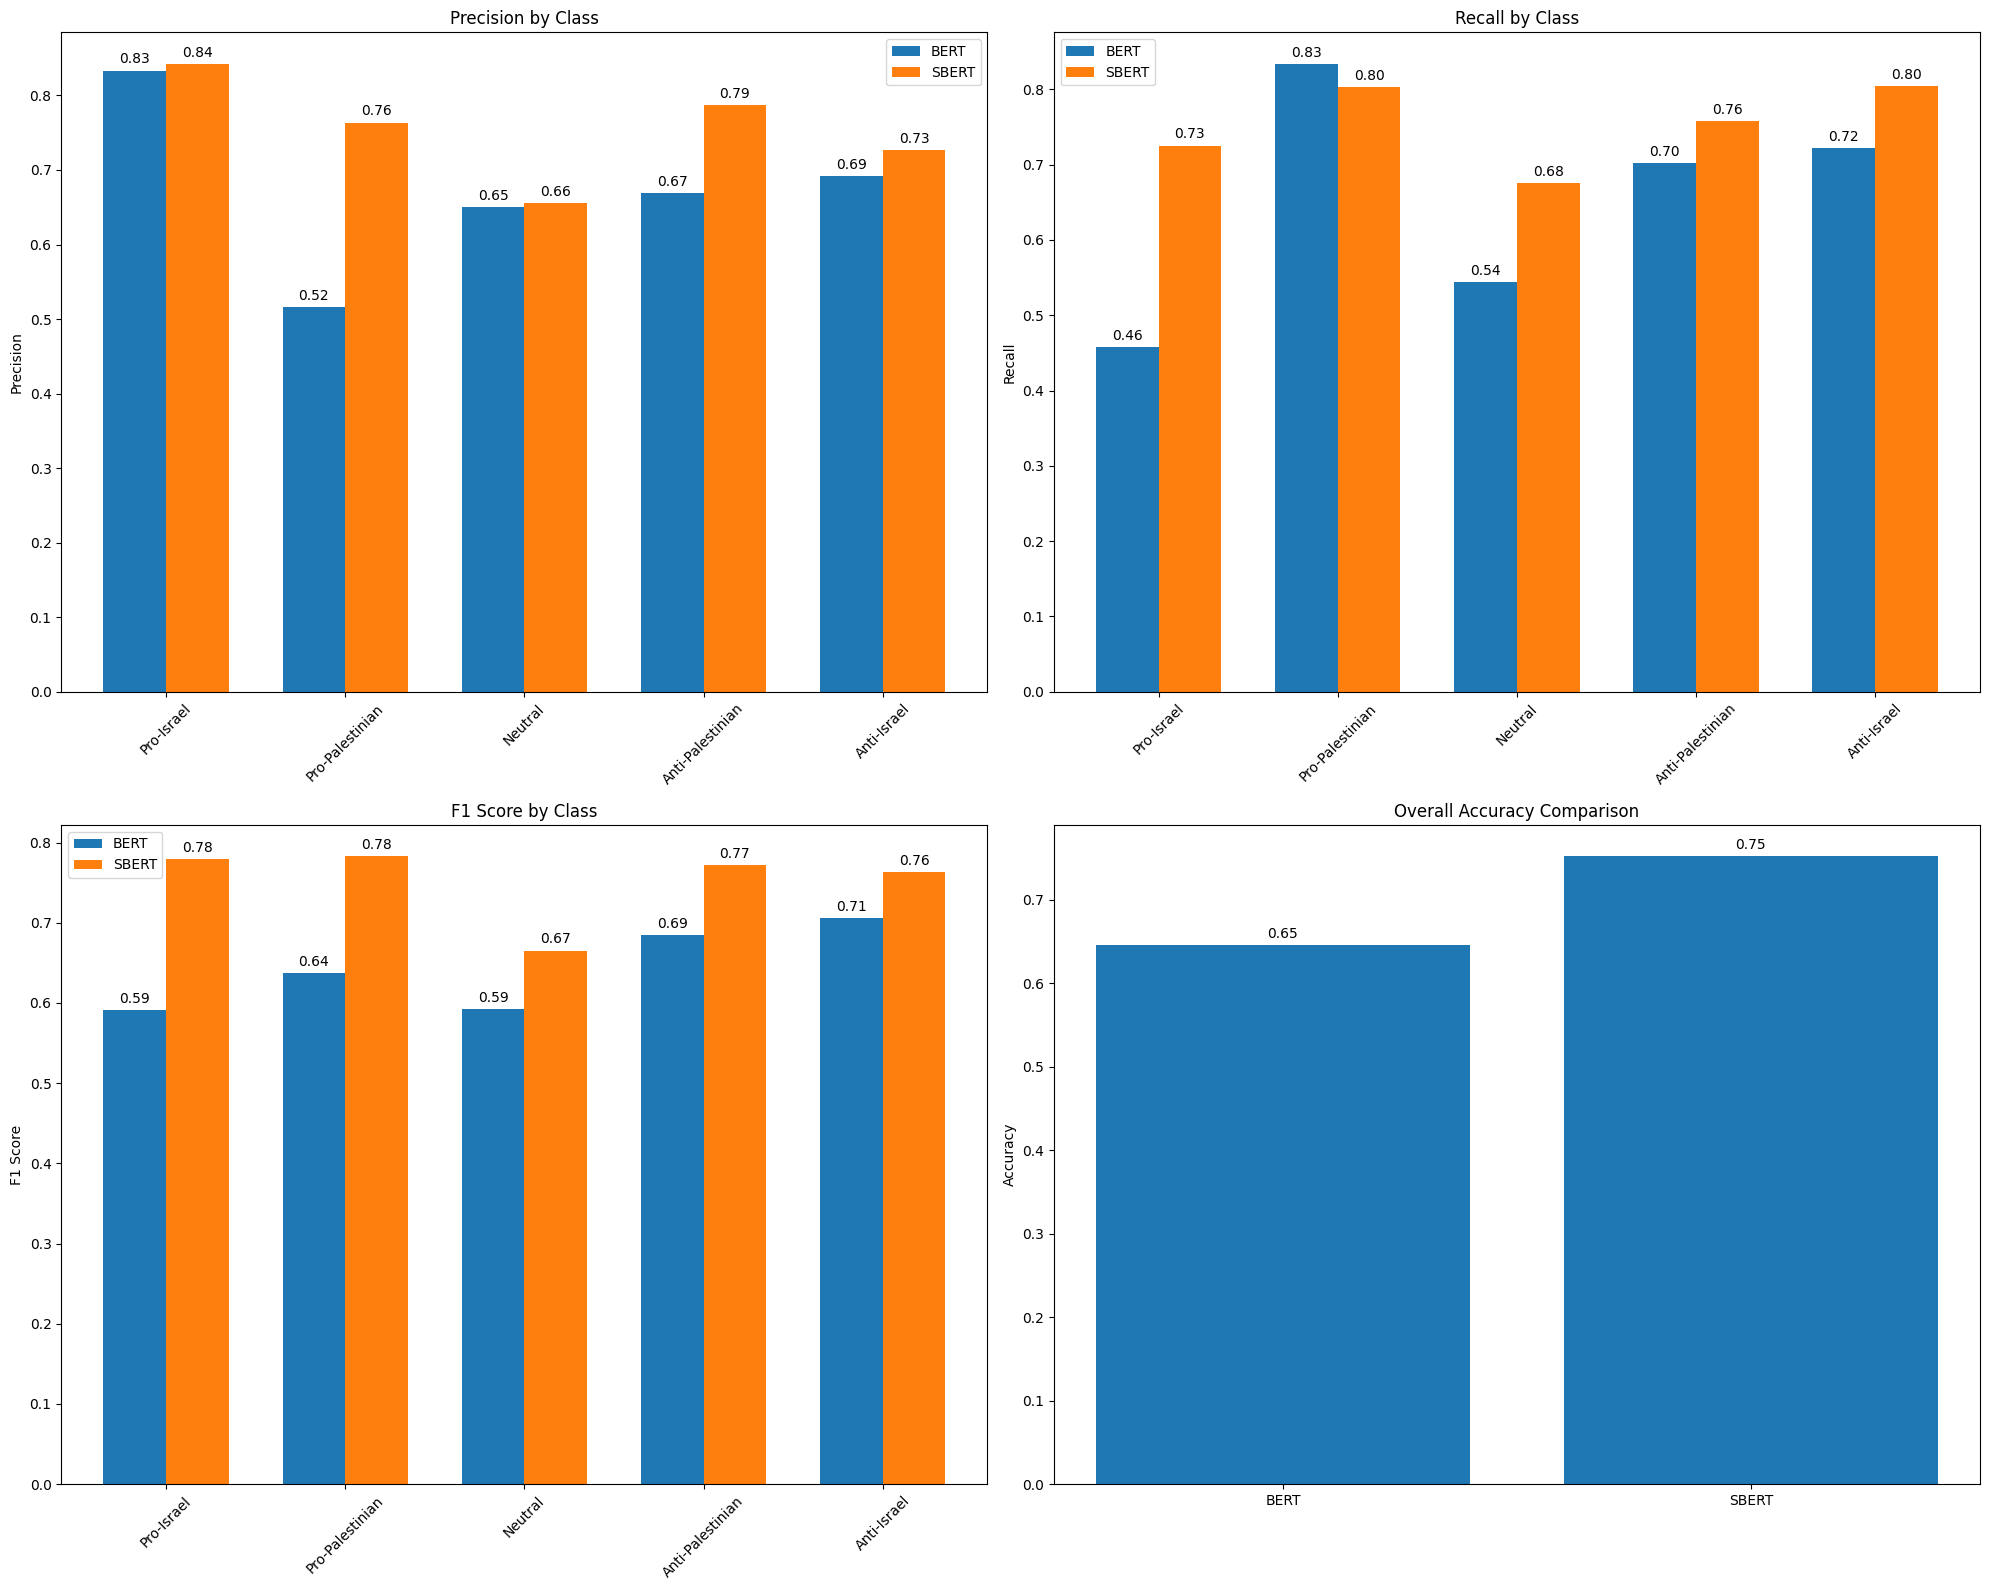

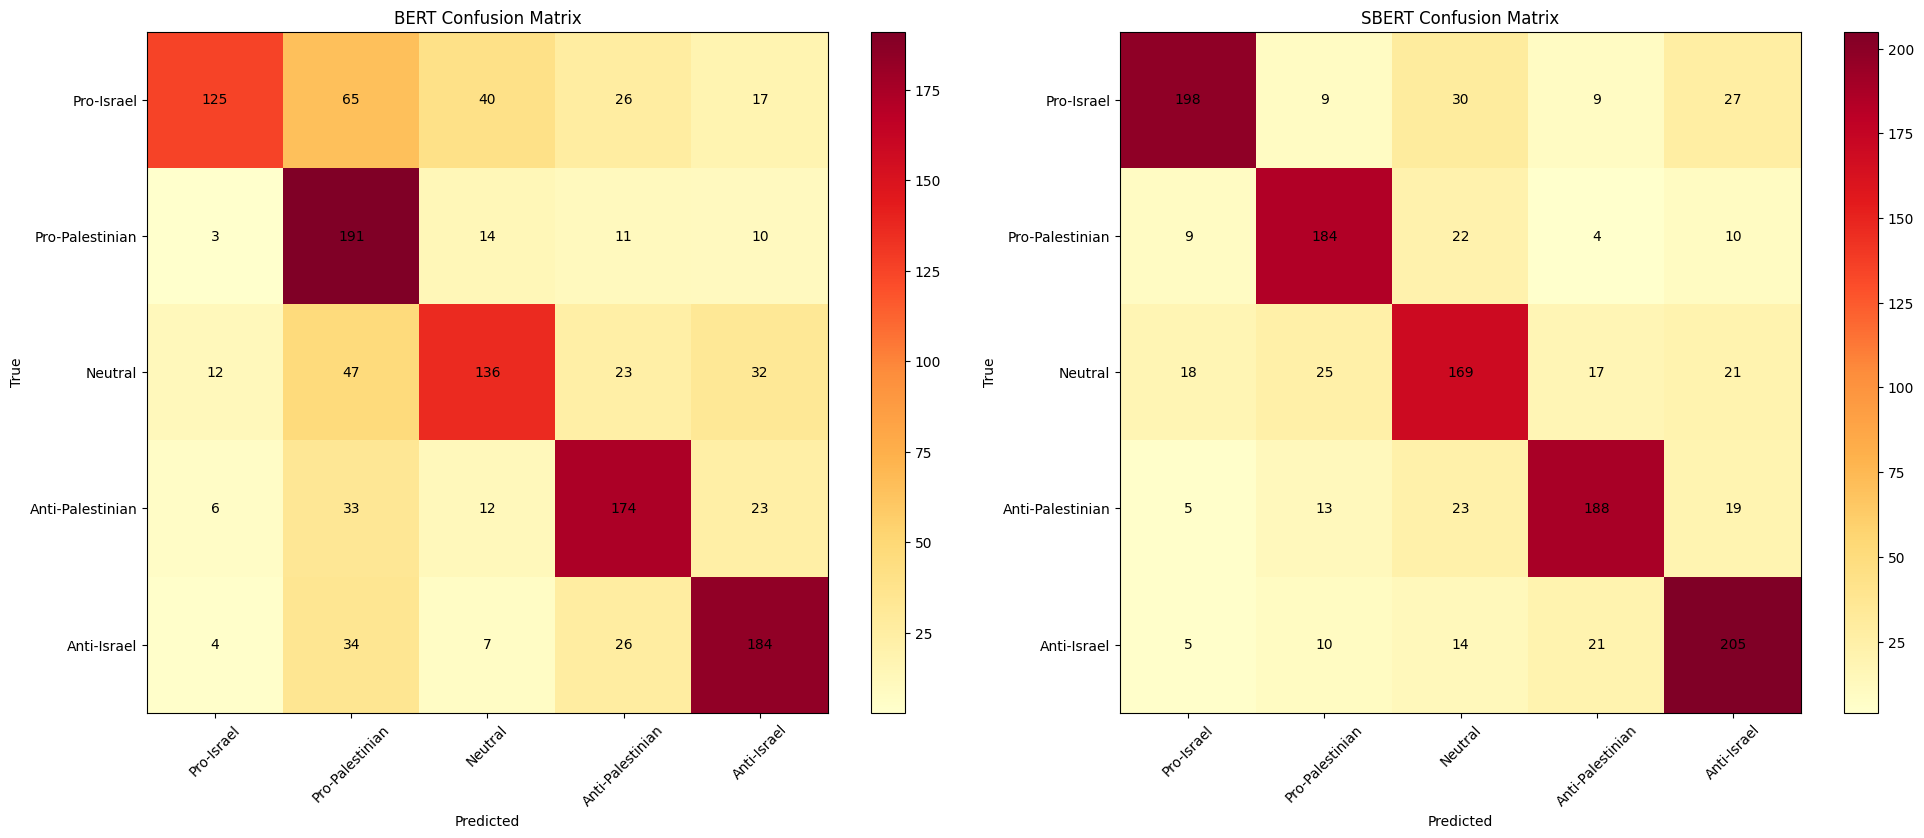

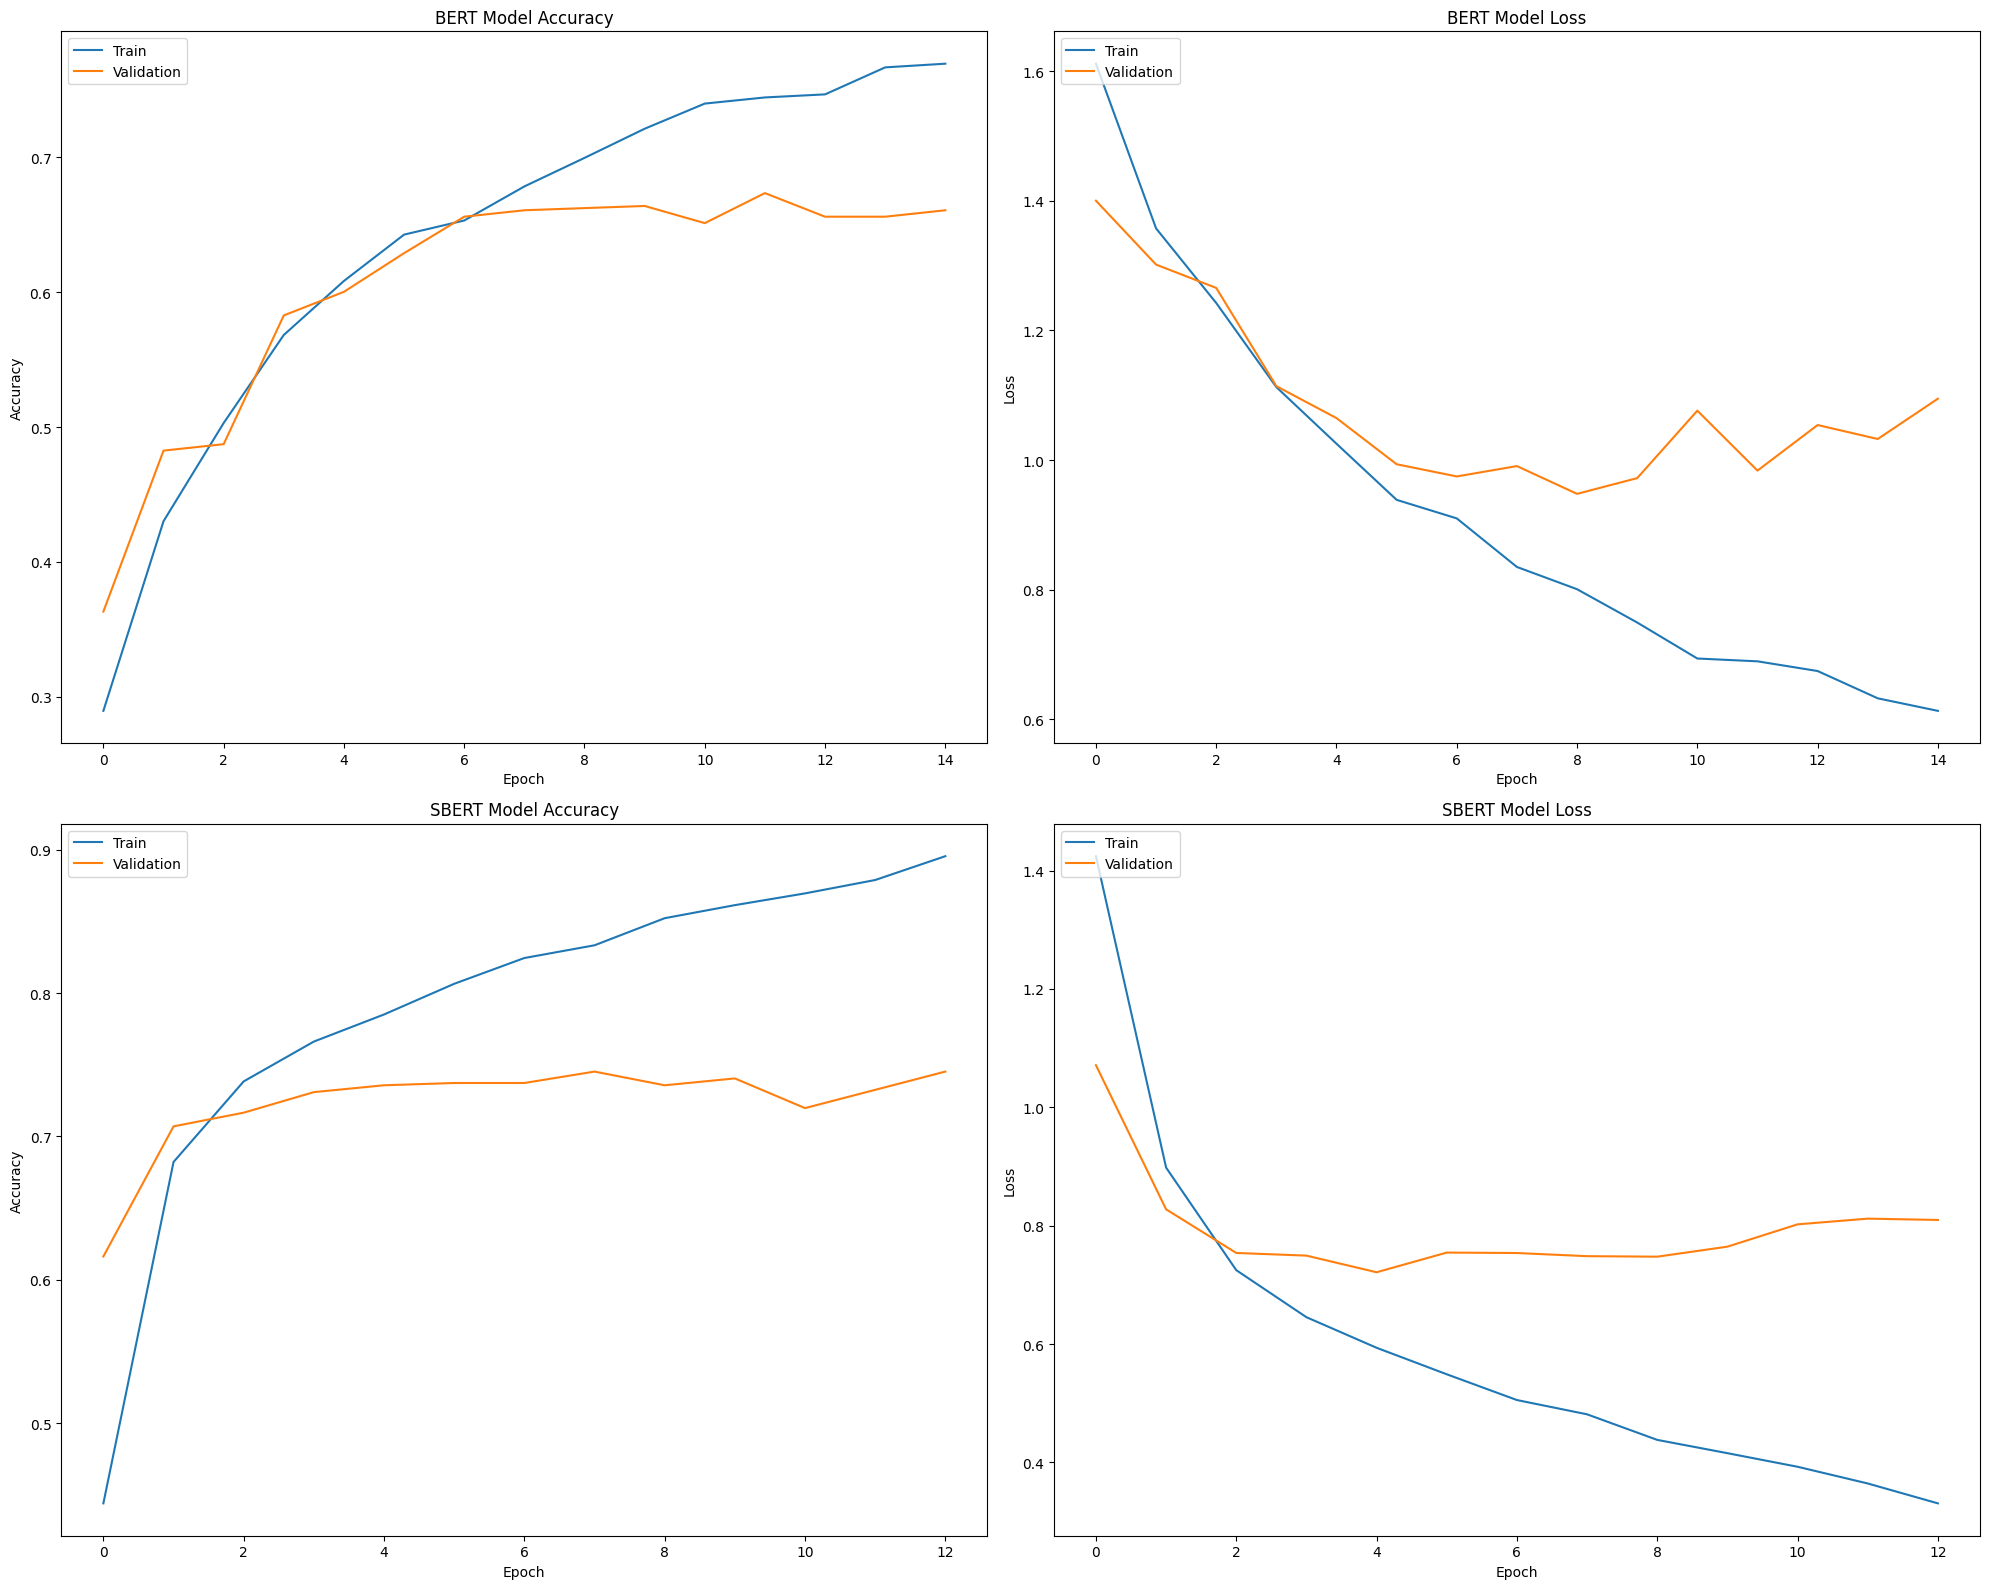

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics_comparison(bert_metrics, sbert_metrics, class_names):
    # Set style and figure size
    # plt.style.use('seaborn')

    # Create metrics comparison plots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

    x = np.arange(len(class_names))
    width = 0.35

    # Precision Plot
    ax1.bar(x - width/2, bert_metrics['precision'], width, label='BERT')
    ax1.bar(x + width/2, sbert_metrics['precision'], width, label='SBERT')
    ax1.set_ylabel('Precision')
    ax1.set_title('Precision by Class')
    ax1.set_xticks(x)
    ax1.set_xticklabels(class_names, rotation=45)
    ax1.legend()

    # Recall Plot
    ax2.bar(x - width/2, bert_metrics['recall'], width, label='BERT')
    ax2.bar(x + width/2, sbert_metrics['recall'], width, label='SBERT')
    ax2.set_ylabel('Recall')
    ax2.set_title('Recall by Class')
    ax2.set_xticks(x)
    ax2.set_xticklabels(class_names, rotation=45)
    ax2.legend()

    # F1 Score Plot
    ax3.bar(x - width/2, bert_metrics['f1'], width, label='BERT')
    ax3.bar(x + width/2, sbert_metrics['f1'], width, label='SBERT')
    ax3.set_ylabel('F1 Score')
    ax3.set_title('F1 Score by Class')
    ax3.set_xticks(x)
    ax3.set_xticklabels(class_names, rotation=45)
    ax3.legend()

    # Overall Accuracy Plot
    accuracies = [bert_metrics['accuracy'], sbert_metrics['accuracy']]
    ax4.bar(['BERT', 'SBERT'], accuracies)
    ax4.set_ylabel('Accuracy')
    ax4.set_title('Overall Accuracy Comparison')

    # Add value labels on bars
    for ax in [ax1, ax2, ax3]:
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', padding=3)
    ax4.bar_label(ax4.containers[0], fmt='%.2f', padding=3)

    plt.tight_layout()
    plt.savefig('model_metrics_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create heatmaps for confusion matrices
def plot_confusion_matrices(y_true, y_pred_bert, y_pred_sbert, class_names):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Convert predictions to class indices if they're one-hot encoded
    if len(y_true.shape) > 1:
        y_true = np.argmax(y_true, axis=1)
    if len(y_pred_bert.shape) > 1:
        y_pred_bert = np.argmax(y_pred_bert, axis=1)
    if len(y_pred_sbert.shape) > 1:
        y_pred_sbert = np.argmax(y_pred_sbert, axis=1)

    # Create confusion matrices
    cm_bert = confusion_matrix(y_true, y_pred_bert)
    cm_sbert = confusion_matrix(y_true, y_pred_sbert)

    # Plot BERT confusion matrix
    im1 = ax1.imshow(cm_bert, cmap='YlOrRd')
    ax1.set_title('BERT Confusion Matrix')

    # Plot SBERT confusion matrix
    im2 = ax2.imshow(cm_sbert, cmap='YlOrRd')
    ax2.set_title('SBERT Confusion Matrix')

    # Add labels to both plots
    for ax in [ax1, ax2]:
        ax.set_xticks(np.arange(len(class_names)))
        ax.set_yticks(np.arange(len(class_names)))
        ax.set_xticklabels(class_names, rotation=45)
        ax.set_yticklabels(class_names)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')

    # Add colorbar
    plt.colorbar(im1, ax=ax1)
    plt.colorbar(im2, ax=ax2)

    # Add numbers to cells
    def add_values(ax, cm):
        for i in range(len(class_names)):
            for j in range(len(class_names)):
                ax.text(j, i, str(cm[i, j]),
                        ha="center", va="center")

    add_values(ax1, cm_bert)
    add_values(ax2, cm_sbert)

    plt.tight_layout()
    plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the plotting functions
plot_metrics_comparison(bert_metrics, sbert_metrics, class_names)
plot_confusion_matrices(y_bert_test, bert_predictions, sbert_predictions, class_names)

# Additionally, let's plot the training history
def plot_training_history(bert_history, sbert_history):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

    # Plot training & validation accuracy values for BERT
    ax1.plot(bert_history.history['accuracy'])
    ax1.plot(bert_history.history['val_accuracy'])
    ax1.set_title('BERT Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values for BERT
    ax2.plot(bert_history.history['loss'])
    ax2.plot(bert_history.history['val_loss'])
    ax2.set_title('BERT Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation accuracy values for SBERT
    ax3.plot(sbert_history.history['accuracy'])
    ax3.plot(sbert_history.history['val_accuracy'])
    ax3.set_title('SBERT Model Accuracy')
    ax3.set_ylabel('Accuracy')
    ax3.set_xlabel('Epoch')
    ax3.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values for SBERT
    ax4.plot(sbert_history.history['loss'])
    ax4.plot(sbert_history.history['val_loss'])
    ax4.set_title('SBERT Model Loss')
    ax4.set_ylabel('Loss')
    ax4.set_xlabel('Epoch')
    ax4.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the training history plotting function
plot_training_history(bert_history, sbert_history)

In [58]:
# take a random sample of 100 instance from each data
# take a random sample of 100 instance from each data
num_samples = 100

# Select random indices for pro_israel_bert_data
indices = np.random.choice(pro_israel_bert_data.shape[0], size=num_samples, replace=False)
pro_israel_bert_data = pro_israel_bert_data[indices]
pro_israel_sbert_data = pro_israel_sbert_data[indices]

pro_palestine_bert_data = pro_palestine_bert_data[indices]
pro_palestine_sbert_data = pro_palestine_sbert_data[indices]

neutral_bert_data = neutral_bert_data[indices]
neutral_sbert_data = neutral_sbert_data[indices]


anti_israel_bert_data = anti_israel_bert_data[indices]
anti_israel_sbert_data = anti_israel_sbert_data[indices]

anti_palestine_bert_data = anti_palestine_bert_data[indices]
anti_palestine_sbert_data = anti_palestine_sbert_data[indices]

In [59]:
# For BERT data (768 dimensions)
X_bert = np.vstack([
    pro_israel_bert_data,
    pro_palestine_bert_data,
    neutral_bert_data,
    anti_palestine_bert_data,
    anti_israel_bert_data
])

y_bert = np.array(
    [0] * len(pro_israel_bert_data) +       # 0s for pro-israel
    [1] * len(pro_palestine_bert_data) +    # 1s for pro-palestinian
    [2] * len(neutral_bert_data) +          # 2s for neutral
    [3] * len(anti_palestine_bert_data) +   # 3s for anti-palestinian
    [4] * len(anti_israel_bert_data)        # 4s for anti-israel
)

y_bert_onehot = to_categorical(y_bert)

In [60]:
# Do the same for SBERT data (384 dimensions)
X_sbert = np.vstack([
    pro_israel_sbert_data,
    pro_palestine_sbert_data,
    neutral_sbert_data,
    anti_palestine_sbert_data,
    anti_israel_sbert_data
])

# The labels will be the same as for BERT
y_sbert = y_bert.copy()
y_sbert_onehot = to_categorical(y_sbert)

In [61]:
# Split the data (80% train, 20% test)
X_bert_train, X_bert_test, y_bert_train, y_bert_test = train_test_split(
    X_bert, y_bert_onehot, test_size=0.2, random_state=42
)

In [62]:
# Split SBERT data
X_sbert_train, X_sbert_test, y_sbert_train, y_sbert_test = train_test_split(
    X_sbert, y_sbert_onehot, test_size=0.2, random_state=42
)

## LoR and SVM

In [63]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# SVM for BERT
svm_bert = SVC(probability=True)
svm_bert_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "class_weight": [None, "balanced"],
}
grid_svm_bert = GridSearchCV(svm_bert, svm_bert_params, cv=10, scoring="accuracy")
grid_svm_bert.fit(X_bert_train, np.argmax(y_bert_train, axis=1))
best_svm_bert = grid_svm_bert.best_estimator_

In [64]:
# SVM for SBERT
svm_sbert = SVC(probability=True)
svm_sbert_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "class_weight": [None, "balanced"],
}
grid_svm_sbert = GridSearchCV(svm_sbert, svm_sbert_params, cv=10, scoring="accuracy")
grid_svm_sbert.fit(X_sbert_train, np.argmax(y_sbert_train, axis=1))
best_svm_sbert = grid_svm_sbert.best_estimator_

In [65]:
# Logistic Regression for BERT
lor_bert = LogisticRegression(multi_class="multinomial", max_iter=1000)
lor_bert_params = {
    "C": [0.1, 1, 10],
    "solver": ["lbfgs", "newton-cg"],
    "class_weight": [None, "balanced"],
}
grid_lor_bert = GridSearchCV(lor_bert, lor_bert_params, cv=10, scoring="accuracy")
grid_lor_bert.fit(X_bert_train, np.argmax(y_bert_train, axis=1))
best_lor_bert = grid_lor_bert.best_estimator_

In [66]:
# Logistic Regression for SBERT
lor_sbert = LogisticRegression(multi_class="multinomial", max_iter=1000)
lor_sbert_params = {
    "C": [0.1, 1, 10],
    "solver": ["lbfgs", "newton-cg"],
    "class_weight": [None, "balanced"],
}
grid_lor_sbert = GridSearchCV(lor_sbert, lor_sbert_params, cv=10, scoring="accuracy")
grid_lor_sbert.fit(X_sbert_train, np.argmax(y_sbert_train, axis=1))
best_lor_sbert = grid_lor_sbert.best_estimator_

In [67]:
# Predict and evaluate
def evaluate_model(model, X_test, y_test, class_names):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(
        classification_report(
            np.argmax(y_test, axis=1), y_pred, target_names=class_names
        )
    )

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    return model.predict_proba(X_test)

In [68]:
class_names = [
    "pro_israel",
    "pro_palestine",
    "neutral",
    "anti_israel",
    "anti_palestine",
]

In [69]:
# Evaluate models (assuming class_names is already defined)
print("\nSVM BERT:")
svm_bert_proba = evaluate_model(best_svm_bert, X_bert_test, y_bert_test, class_names)

print("\nSVM SBERT:")
svm_sbert_proba = evaluate_model(
    best_svm_sbert, X_sbert_test, y_sbert_test, class_names
)

print("\nLogistic Regression BERT:")
lor_bert_proba = evaluate_model(best_lor_bert, X_bert_test, y_bert_test, class_names)

print("\nLogistic Regression SBERT:")
lor_sbert_proba = evaluate_model(
    best_lor_sbert, X_sbert_test, y_sbert_test, class_names
)


SVM BERT:
Classification Report:
                precision    recall  f1-score   support

    pro_israel       0.47      0.54      0.50        28
 pro_palestine       0.43      0.71      0.54        14
       neutral       0.42      0.50      0.45        10
   anti_israel       0.62      0.42      0.50        24
anti_palestine       0.76      0.54      0.63        24

      accuracy                           0.53       100
     macro avg       0.54      0.54      0.53       100
  weighted avg       0.57      0.53      0.53       100


Confusion Matrix:
[[15  6  3  3  1]
 [ 1 10  2  1  0]
 [ 2  3  5  0  0]
 [ 6  3  2 10  3]
 [ 8  1  0  2 13]]

SVM SBERT:
Classification Report:
                precision    recall  f1-score   support

    pro_israel       0.70      0.57      0.63        28
 pro_palestine       0.52      0.86      0.65        14
       neutral       0.28      0.50      0.36        10
   anti_israel       0.82      0.58      0.68        24
anti_palestine       0.84      0.

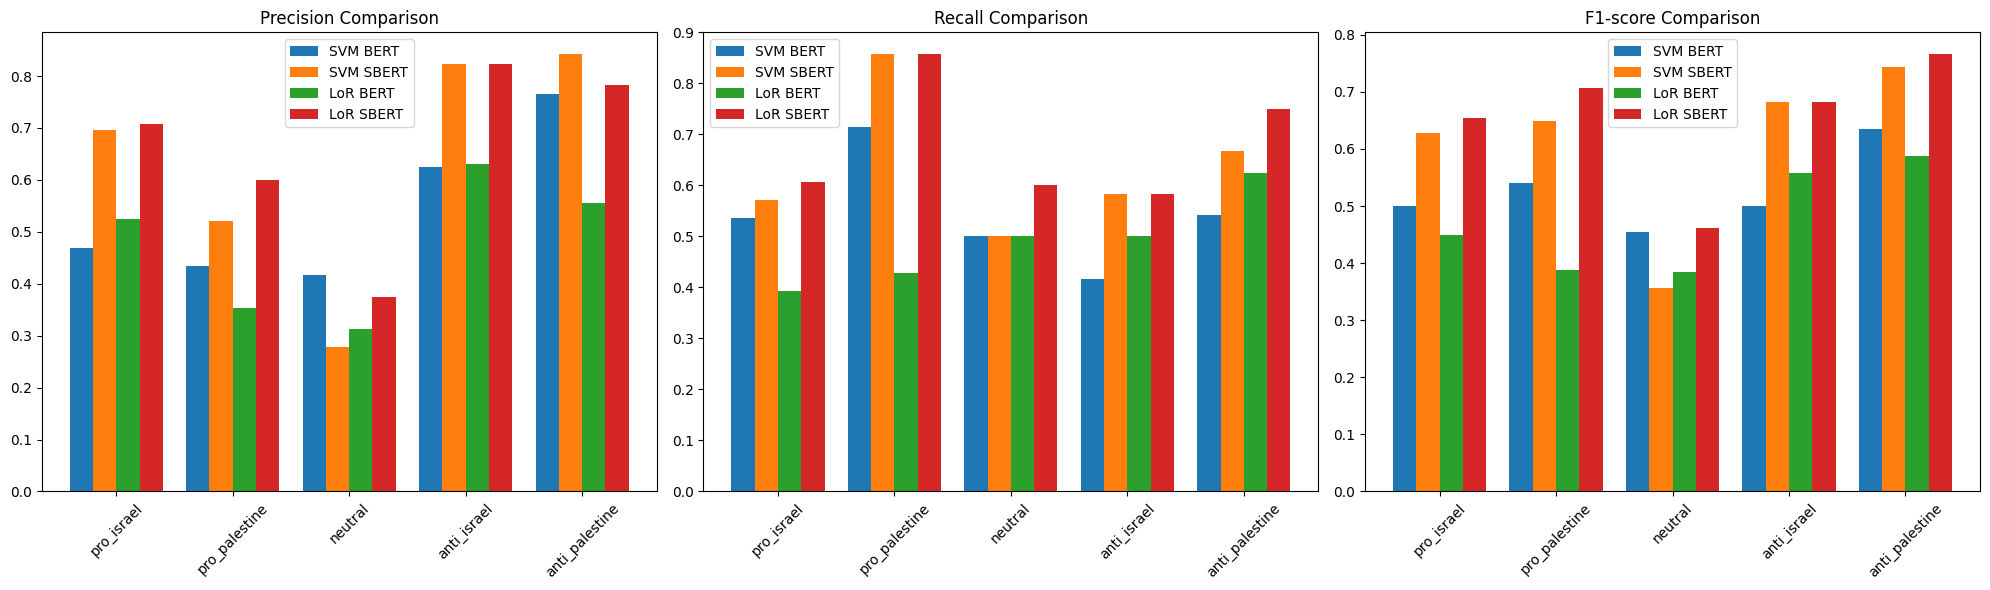

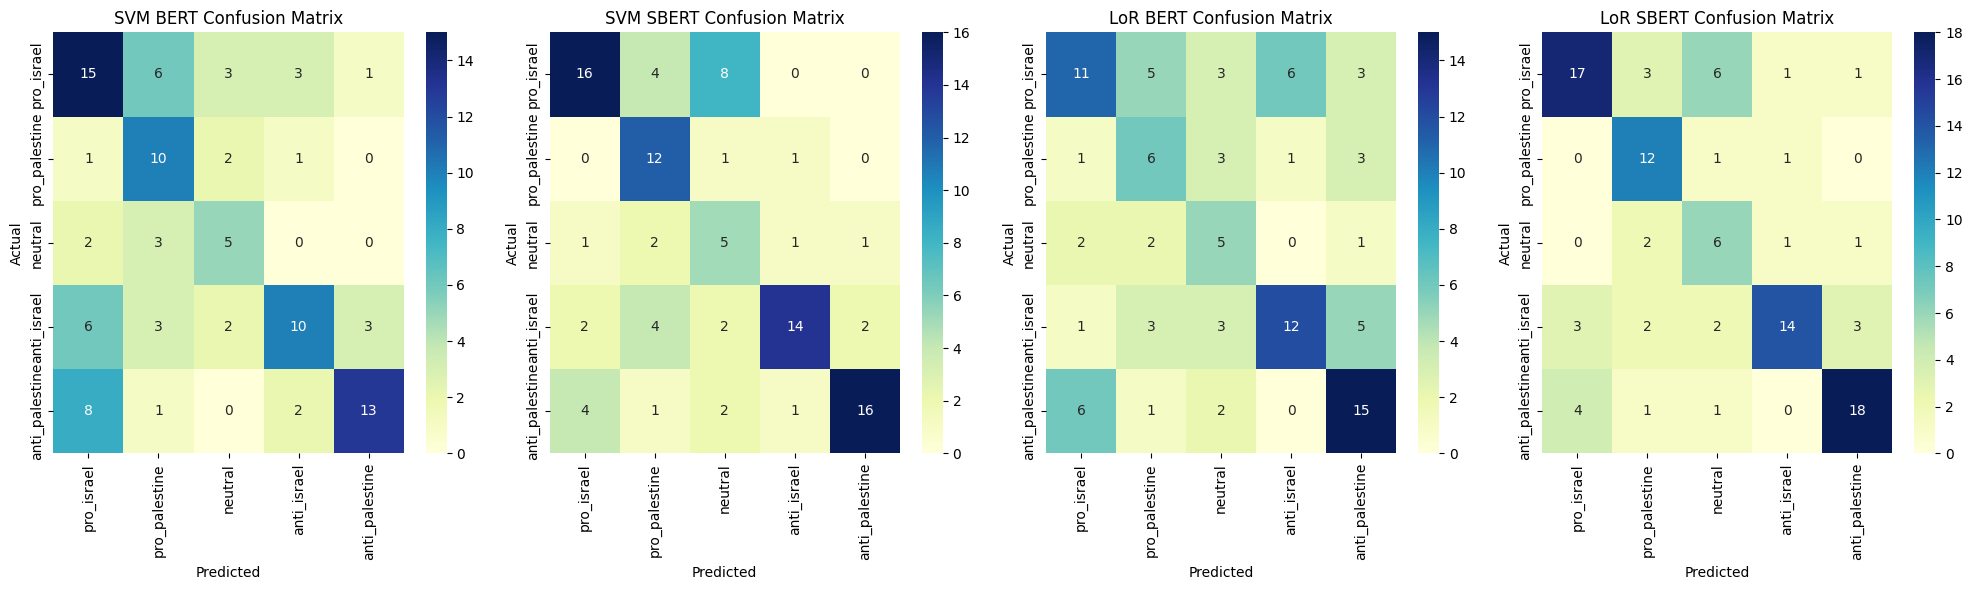

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_metrics_comparison(models_reports, model_names, class_names):
    metrics = ["precision", "recall", "f1-score"]
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    for i, metric in enumerate(metrics):
        x = np.arange(len(class_names))
        width = 0.2

        for j, report in enumerate(models_reports):
            metric_values = [report[cls][metric] for cls in class_names]
            axes[i].bar(x + j * width, metric_values, width, label=model_names[j])

        axes[i].set_title(f"{metric.capitalize()} Comparison")
        axes[i].set_xticks(x + width * (len(model_names) - 1) / 2)
        axes[i].set_xticklabels(class_names, rotation=45)
        axes[i].legend()

    plt.tight_layout()
    plt.savefig("model_metrics_comparison.png")
    plt.show()


def plot_confusion_matrices(cms, model_names, class_names):
    fig, axes = plt.subplots(1, len(cms), figsize=(20, 6))

    for i, (cm, name) in enumerate(zip(cms, model_names)):
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            ax=axes[i],
            cmap="YlGnBu",
            xticklabels=class_names,
            yticklabels=class_names,
        )
        axes[i].set_title(f"{name} Confusion Matrix")
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")

    plt.tight_layout()
    plt.savefig("confusion_matrices.png")
    plt.show()


# Classification report function
def get_classification_report(model, X_test, y_test, class_names):
    y_pred = model.predict(X_test)
    from sklearn.metrics import classification_report

    return classification_report(
        np.argmax(y_test, axis=1), y_pred, target_names=class_names, output_dict=True
    )


# Collect classification reports
svm_bert_report = get_classification_report(
    best_svm_bert, X_bert_test, y_bert_test, class_names
)
svm_sbert_report = get_classification_report(
    best_svm_sbert, X_sbert_test, y_sbert_test, class_names
)
lor_bert_report = get_classification_report(
    best_lor_bert, X_bert_test, y_bert_test, class_names
)
lor_sbert_report = get_classification_report(
    best_lor_sbert, X_sbert_test, y_sbert_test, class_names
)

# Prepare data for plotting
models_reports = [svm_bert_report, svm_sbert_report, lor_bert_report, lor_sbert_report]
model_names = ["SVM BERT", "SVM SBERT", "LoR BERT", "LoR SBERT"]

# Compute confusion matrices
cms = [
    confusion_matrix(
        np.argmax(y_bert_test, axis=1), best_svm_bert.predict(X_bert_test)
    ),
    confusion_matrix(
        np.argmax(y_sbert_test, axis=1), best_svm_sbert.predict(X_sbert_test)
    ),
    confusion_matrix(
        np.argmax(y_bert_test, axis=1), best_lor_bert.predict(X_bert_test)
    ),
    confusion_matrix(
        np.argmax(y_sbert_test, axis=1), best_lor_sbert.predict(X_sbert_test)
    ),
]

# Plot metrics and confusion matrices
plot_metrics_comparison(models_reports, model_names, class_names)
plot_confusion_matrices(cms, model_names, class_names)

## Using the models to classify the sentences

In [71]:
# classify them
# output csv: id (str), sentence (str), ANN-BERT-Class (str), ANN-BERT-Grad (float), ...

import pandas as pd

# Columns in df_test: [id,sentence,bert_embedding,sbert_embedding]

## for each of the models ANN, SVM, LoR
## run each sentences through the model (using the BERT and SBERT embedding)
## output a df id, sentence, ANN-BERT-Classs, ....

columns = ["id", "sentence",
          "ANN-BERT-Class", "ANN-BERT-Grad",
          "ANN-SBERT-Class", "ANN-SBERT-Grad",
          "SVM-BERT-Class", "SVM-BERT-Grad",
          "SVM-SBERT-Class", "SVM-SBERT-Grad",
          "LoR-BERT-Class", "LoR-BERT-Grad",
          "LoR-SBERT-Class", "LoR-SBERT-Grad",
           ]

output_df = pd.DataFrame(columns=columns)
# copy the id, sentneces from the data_df
output_df["id"] = df_test["id"]
output_df["sentence"] = df_test["sentence"]

In [72]:
bert_embeddings = np.array([eval(instance) for instance in df_test["bert_embedding"]])
sbert_embeddings = np.array([eval(instance) for instance in df_test["sbert_embedding"]])

In [77]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

best_ann_bert = tf.keras.models.load_model('best_bert_model.h5')
best_ann_sbert = tf.keras.models.load_model('best_sbert_model.h5')

In [78]:
# use ANN to classifiy each of the sentneces in df_test

# for each sentence in the df_test use the ANN to pass it the BERT and SBRT
# vectors and get both the class in string form and the argmax of the last
# layer

bert_predictions = best_ann_bert.predict(bert_embeddings)
sbert_predictions = best_ann_sbert.predict(sbert_embeddings)

# get the value of the argmax

bert_predictions_grad = np.max(bert_predictions, axis=1)
sbert_predictions_grad = np.max(sbert_predictions, axis=1)

bert_predictions = np.argmax(bert_predictions, axis=1)
sbert_predictions = np.argmax(sbert_predictions, axis=1)

bert_predictions = [class_names[pred] for pred in bert_predictions]
sbert_predictions = [class_names[pred] for pred in sbert_predictions]

output_df["ANN-BERT-Class"] = bert_predictions
output_df["ANN-SBERT-Class"] = sbert_predictions

output_df["ANN-BERT-Grad"] = bert_predictions_grad
output_df["ANN-SBERT-Grad"] = sbert_predictions_grad

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [79]:
# do the same for SVM

bert_predictions = best_svm_bert.predict_proba(bert_embeddings)
sbert_predictions = best_svm_sbert.predict_proba(sbert_embeddings)

# get the value of the argmax

bert_predictions_grad = np.max(bert_predictions, axis=1)
sbert_predictions_grad = np.max(sbert_predictions, axis=1)

bert_predictions = np.argmax(bert_predictions, axis=1)
sbert_predictions = np.argmax(sbert_predictions, axis=1)

bert_predictions = [class_names[pred] for pred in bert_predictions]
sbert_predictions = [class_names[pred] for pred in sbert_predictions]

output_df["SVM-BERT-Class"] = bert_predictions
output_df["SVM-SBERT-Class"] = sbert_predictions

output_df["SVM-BERT-Grad"] = bert_predictions_grad
output_df["SVM-SBERT-Grad"] = sbert_predictions_grad

In [80]:
# do the same for LoR

bert_predictions = best_lor_bert.predict_proba(bert_embeddings)
sbert_predictions = best_lor_sbert.predict_proba(sbert_embeddings)

# get the value of the argmax

bert_predictions_grad = np.max(bert_predictions, axis=1)
sbert_predictions_grad = np.max(sbert_predictions, axis=1)

bert_predictions = np.argmax(bert_predictions, axis=1)
sbert_predictions = np.argmax(sbert_predictions, axis=1)

bert_predictions = [class_names[pred] for pred in bert_predictions]
sbert_predictions = [class_names[pred] for pred in sbert_predictions]

output_df["LoR-BERT-Class"] = bert_predictions
output_df["LoR-SBERT-Class"] = sbert_predictions

output_df["LoR-BERT-Grad"] = bert_predictions_grad
output_df["LoR-SBERT-Grad"] = sbert_predictions_grad

In [81]:
output_df.head()

,id,sentence,ANN-BERT-Class,ANN-BERT-Grad,ANN-SBERT-Class,ANN-SBERT-Grad,SVM-BERT-Class,SVM-BERT-Grad,SVM-SBERT-Class,SVM-SBERT-Grad,LoR-BERT-Class,LoR-BERT-Grad,LoR-SBERT-Class,LoR-SBERT-Grad
0,jp_374,Then we wanted to make aliyah even faster,anti_israel,0.381784,neutral,0.744713,neutral,0.340195,neutral,0.855487,anti_palestine,0.955315,neutral,0.903496
1,bbc_129,an idf spokesman previously referred to the op...,pro_israel,0.476504,pro_israel,0.997907,pro_israel,0.388539,pro_israel,0.954586,anti_palestine,0.650429,pro_israel,0.986696
2,bbc_177,the idf hasnt been able to get to the top bras...,pro_israel,0.580511,pro_israel,0.769271,pro_israel,0.573923,pro_israel,0.369011,pro_israel,1.000000,neutral,0.442018
3,bbc_91,more than half of gazas 2 3 million palestini...,pro_israel,0.340313,pro_israel,0.844751,pro_israel,0.296911,pro_palestine,0.361319,pro_israel,0.999529,pro_palestine,0.398227
4,bbc_176,the idf said a series of mistakes and miscommu...,pro_israel,0.957914,pro_israel,0.983013,anti_palestine,0.373972,pro_israel,0.507826,anti_palestine,0.980992,pro_israel,0.693548


In [82]:
# save the output_df into a file

output_df.to_csv("bonus_output.csv", index=False)